## Introduction

The Disease Prediction Model is a machine learning project designed to predict diseases based on patient health data. The model is trained using classification approach to analyze symptoms and provide predictions that can assist in healthcare diagnostics.

## Step 1: Data Mining

In [1]:
# import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [18]:
# read the dataset
# df = pd.read_csv('heart_dataset.csv')
# df.head()

df = pd.read_csv("heart (1) data.csv")
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.columns 


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
d = df.dtypes
d

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [22]:
# check for categorical data 
d[d == 'object'] 

Series([], dtype: object)

## Step 2: Data Preprocessing

In [23]:
# check for missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
df.plot(kind='box', layout=(4,3), figsize=(14,10), subplots=True)
plt.show()

ValueError: Layout of 4x3 must be larger than required size 14

<Figure size 1400x1000 with 0 Axes>

## Report: 
-  There's no missing values in the dataset


## Step 3: Exploratory Data Analysis

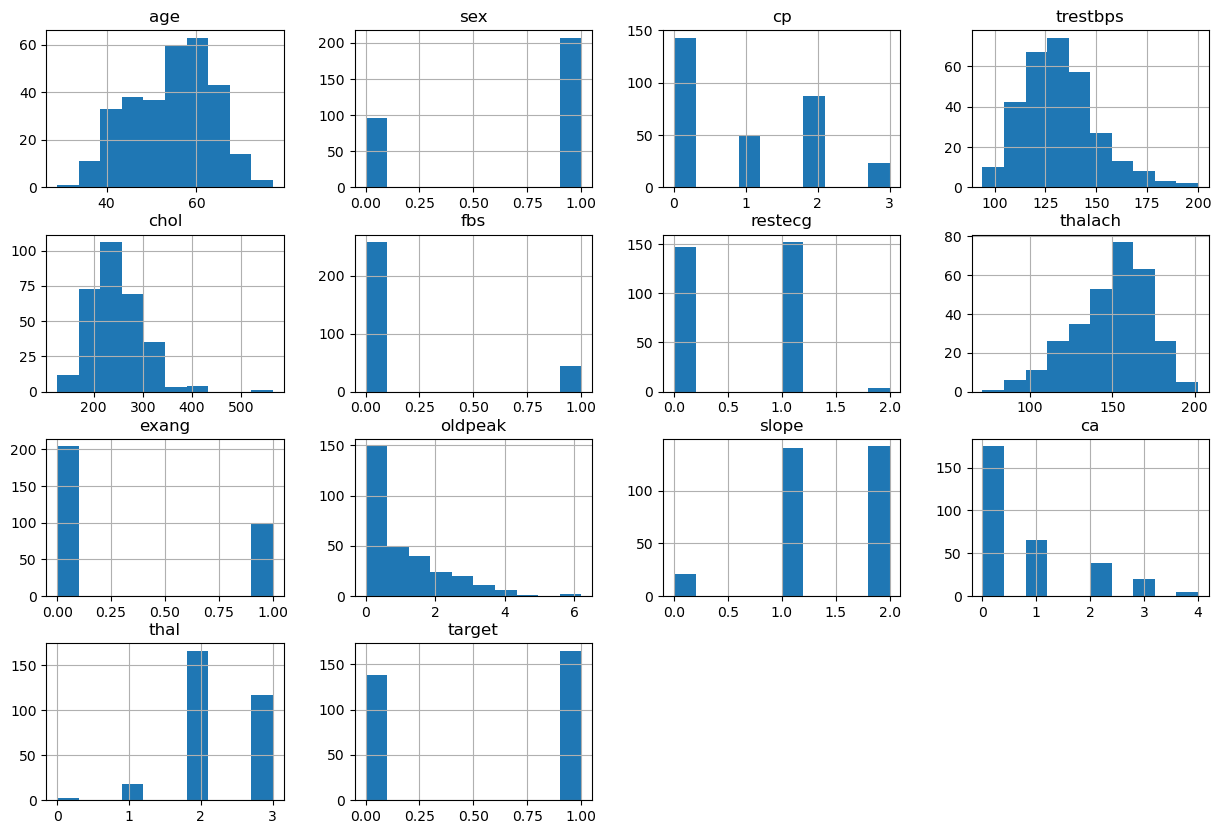

<Figure size 1400x600 with 0 Axes>

In [25]:
# create a numerical data from the dataset
numeric_cols = df.select_dtypes(include='number').columns

# create a univariate analysis of the numeric_cols 
df[numeric_cols].hist(figsize=(15,10)) 
plt.figure(figsize=(14,6))
plt.tight_layout()
plt.show()

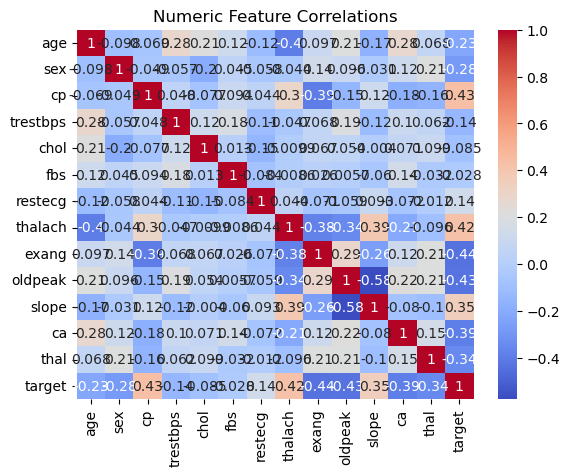

In [26]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations') 
plt.show()

In [27]:
# check for bivariate analysis 
cat_cols = df.select_dtypes(include='object').columns
cat_cols
# create a univariate analysis of the numeric_cols 
# sns.countplot()
# plt.tight_layout()
# plt.show()

Index([], dtype='object')

<Axes: xlabel='restecg', ylabel='count'>

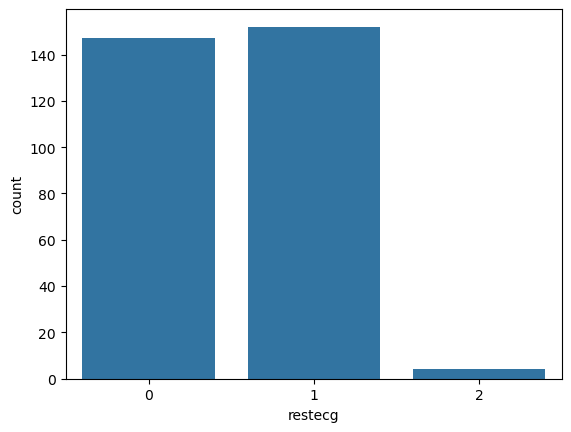

In [28]:
sns.countplot(data=df, x='restecg')

<Axes: xlabel='slope', ylabel='count'>

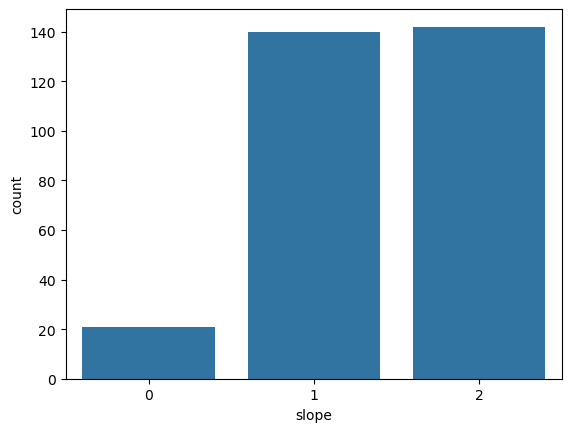

In [29]:
sns.countplot(data=df, x = 'slope')

<Axes: xlabel='thal', ylabel='count'>

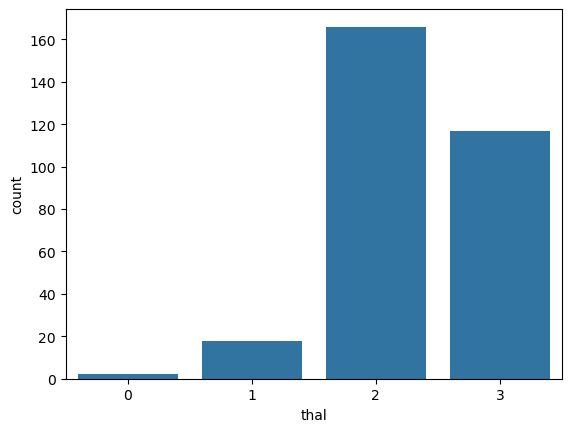

In [30]:
sns.countplot(data=df, x='thal')

Text(0, 0.5, 'Age')

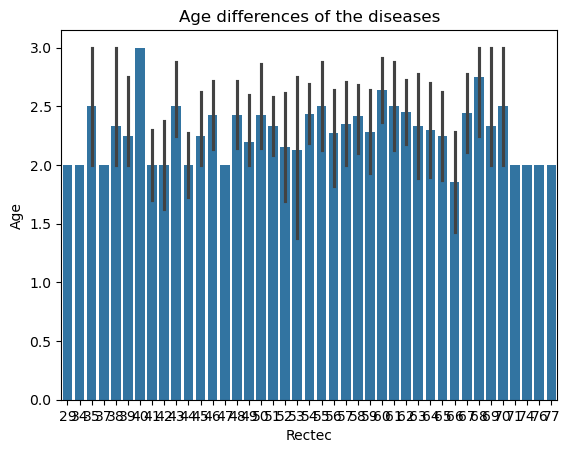

In [31]:
# check for bivariate analysis
plt.Figure(figsize=(10,8))
sns.barplot(x='age', y='thal', data=df)
plt.title('Age differences of the diseases')
plt.xlabel('Rectec')
plt.ylabel('Age')


## Step 3: Model Training

In [32]:
# Perform one-hot encode all 'object' categorical columns 
cat_cols = df.select_dtypes(include='object').columns.tolist 
if 'target' in cat_cols:
    cat_cols.remove('target') 


TypeError: argument of type 'method' is not iterable

In [33]:
X = df.drop('target', axis=1)
y = (df['target'] > 0).astype(int)

In [35]:
X = pd.get_dummies(X)
print("Final Features Columns:", X.columns)

Final Features Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


## Train the Model: Train/Test Split, Normalization and Modelling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [66]:
# scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [39]:
# Train logistic regression
from sklearn.linear_model import LogisticRegression

In [41]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Step 5: M

In [51]:
from sklearn.preprocessing import RobustScaler
rsc = RobustScaler() 

In [52]:
X = df.drop('target', axis=1)
y = (df['target'] > 0).astype(int)

In [53]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [54]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [55]:
data_scale = rsc.fit_transform(X)


In [67]:
X_scale = pd.DataFrame(X_train_scaled, columns=[X.columns])
X_scale

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.356798,0.722504,0.008099,-0.616856,0.914034,-0.383301,0.843133,0.532781,-0.676632,-0.920864,0.953905,-0.689701,-0.509048
1,0.385086,0.722504,-0.971891,1.169491,0.439527,-0.383301,-1.046109,-1.753582,1.477907,-0.193787,0.953905,-0.689701,1.178480
2,-0.921327,0.722504,0.988089,1.169491,-0.300704,-0.383301,0.843133,-0.139679,-0.676632,2.350982,-0.694988,-0.689701,-0.509048
3,0.058483,-1.384075,0.008099,0.276318,0.059921,-0.383301,-1.046109,0.487950,-0.676632,0.351521,-0.694988,-0.689701,-0.509048
4,0.602822,0.722504,-0.971891,-0.795490,-0.319684,2.608918,0.843133,0.443119,1.477907,0.351521,0.953905,1.333421,1.178480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,-0.485856,0.722504,0.988089,0.574042,-0.262744,-0.383301,0.843133,0.577611,-0.676632,-0.375556,-0.694988,0.321860,1.178480
238,-0.376988,0.722504,0.988089,-2.165023,-0.376625,-0.383301,0.843133,0.174136,1.477907,-0.920864,0.953905,0.321860,1.178480
239,1.582631,0.722504,1.968079,1.764940,-0.243763,2.608918,-1.046109,-0.856969,-0.676632,-0.829979,-0.694988,0.321860,-0.509048
240,-0.921327,0.722504,-0.971891,-0.616856,0.040941,-0.383301,-1.046109,-0.274171,-0.676632,-0.193787,0.953905,-0.689701,1.178480


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scale,y_train, test_size= 0.2, shuffle = True, random_state = 42)

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [71]:
nb = GaussianNB()
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
lsvm = LinearSVC(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state= 42)
lr = LogisticRegression(random_state = 42)
xg = XGBClassifier(random_state = 42) 

In [72]:
# Let's create a dictionary of model names and models objects
models = {'nb':nb,'knn':knn,'svm':svm,'lsvm':lsvm,'dt':dt,'rf':rf,'lr':lr,'xg': xg}

#import evaluation parameters
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, precision_score, f1_score, recall_score 

In [75]:
def model_results(m):
    plt.figure(figsize=(5,5))
    num =0
    for model in m:
        num +=1
        m[model].fit(X_train_scaled,y_train)
        print(num+0.1, model,f"accurracy score on trainset: ", m[model].score(x_train,y_train).round(2)*100)
        print(num+0.2, model,f"accuracy score on testset: ", accuracy_score(y_test, m[model].predict(x_test)).round(2)*100)
        print(num+0.3, model,f"precision score on testset: ", precision_score(y_test, m[model].predict(x_test)).round(2)*100)
        print(num+0.4, model,f"roc_auc score on testset: ", roc_auc_score(y_test, m[model].predict(x_test)).round(2)*100)
        print(num+0.5, model,f"recall_score on testset: ", recall_score(y_test, m[model].predict(x_test)).round(2)*100)
        print(num+0.6, model,f"f1_score on testset: ", f1_score(y_test, m[model].predict(x_test)).round(2)*100)
        
        print(f"confusion matrix:\n",ConfusionMatrixDisplay(confusion_matrix(y_test, m[model].predict(x_test)),display_labels=[model+"no cardio",model+"cardio"],).plot()) 

In [76]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train_scaled shape: (242, 13)
y_train shape: (193,)
X_test shape: (61, 13)
y_test shape: (49,)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [78]:
from sklearn.metrics import accuracy_score

def model_results(models, X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Fits models, evaluates them, and prints accuracy on train & test sets.

    Parameters
    ----------
    models : dict
        Dictionary of sklearn models, e.g. {"LogReg": LogisticRegression(), "NB": GaussianNB()}
    X_train_scaled : np.array or pd.DataFrame
        Training features (scaled).
    X_test_scaled : np.array or pd.DataFrame
        Test features (scaled).
    y_train : array-like
        Training labels.
    y_test : array-like
        Test labels.
    """

    # --- Sanity checks ---
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
    print(f"y_test shape: {y_test.shape}")
    print("-" * 50)

    if X_train_scaled.shape[0] != y_train.shape[0]:
        raise ValueError("Mismatch: X_train and y_train have different lengths.")
    if X_test_scaled.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch: X_test and y_test have different lengths.")

    # --- Fit & evaluate models ---
    for i, (name, model) in enumerate(models.items(), 1):
        model.fit(X_train_scaled, y_train)

        train_acc = model.score(X_train_scaled, y_train) * 100
        test_acc = accuracy_score(y_test, model.predict(X_test_scaled)) * 100

        print(f"{i}. {name}")
        print(f"   Train Accuracy: {train_acc:.2f}%")
        print(f"   Test Accuracy : {test_acc:.2f}%")
        print("-" * 50)


In [79]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

model_results(models, X_train_scaled, X_test_scaled, y_train, y_test)


X_train_scaled shape: (242, 13)
y_train shape: (242,)
X_test_scaled shape: (61, 13)
y_test shape: (61,)
--------------------------------------------------
1. Logistic Regression
   Train Accuracy: 84.30%
   Test Accuracy : 80.33%
--------------------------------------------------
2. Naive Bayes
   Train Accuracy: 84.30%
   Test Accuracy : 81.97%
--------------------------------------------------
3. Random Forest
   Train Accuracy: 100.00%
   Test Accuracy : 81.97%
--------------------------------------------------


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

def model_results(models, X_train_scaled, X_test_scaled, y_train, y_test):
    """
    Fits models, evaluates them, and prints accuracy + confusion matrix.

    Parameters
    ----------
    models : dict
        Dictionary of sklearn models, e.g. {"LogReg": LogisticRegression(), "NB": GaussianNB()}
    X_train_scaled : np.array or pd.DataFrame
        Training features (scaled).
    X_test_scaled : np.array or pd.DataFrame
        Test features (scaled).
    y_train : array-like
        Training labels.
    y_test : array-like
        Test labels.
    """

    # --- Sanity checks ---
    print(f"X_train_scaled shape: {X_train_scaled.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test_scaled shape: {X_test_scaled.shape}")
    print(f"y_test shape: {y_test.shape}")
    print("-" * 60)

    if X_train_scaled.shape[0] != y_train.shape[0]:
        raise ValueError("Mismatch: X_train and y_train have different lengths.")
    if X_test_scaled.shape[0] != y_test.shape[0]:
        raise ValueError("Mismatch: X_test and y_test have different lengths.")

    # --- Fit & evaluate models ---
    for i, (name, model) in enumerate(models.items(), 1):
        model.fit(X_train_scaled, y_train)

        # Predictions
        y_pred = model.predict(X_test_scaled)

        # Metrics
        train_acc = model.score(X_train_scaled, y_train) * 100
        test_acc = accuracy_score(y_test, y_pred) * 100
        cm = confusion_matrix(y_test, y_pred)

        # Print results
        print(f"{i}. {name}")
        print(f"   Train Accuracy: {train_acc:.2f}%")
        print(f"   Test Accuracy : {test_acc:.2f}%")
        print("   Confusion Matrix:")
        print(pd.DataFrame(cm,
                           index=[f"Actual {c}" for c in set(y_test)],
                           columns=[f"Pred {c}" for c in set(y_test)]))
        print("-" * 60)


In [86]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier()
}

model_results(models, X_train_scaled, X_test_scaled, y_train, y_test)


X_train_scaled shape: (242, 13)
y_train shape: (242,)
X_test_scaled shape: (61, 13)
y_test shape: (61,)
------------------------------------------------------------
1. Logistic Regression
   Train Accuracy: 84.30%
   Test Accuracy : 80.33%
   Confusion Matrix:
          Pred 0  Pred 1
Actual 0      19       9
Actual 1       3      30
------------------------------------------------------------
2. Naive Bayes
   Train Accuracy: 84.30%
   Test Accuracy : 81.97%
   Confusion Matrix:
          Pred 0  Pred 1
Actual 0      20       8
Actual 1       3      30
------------------------------------------------------------
3. Random Forest
   Train Accuracy: 100.00%
   Test Accuracy : 81.97%
   Confusion Matrix:
          Pred 0  Pred 1
Actual 0      19       9
Actual 1       2      31
------------------------------------------------------------


In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [91]:
# Evaluate logistic regression
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr)) 

Logistic Regression Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



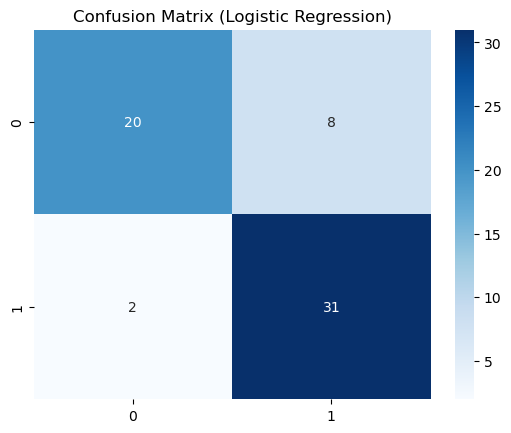

In [92]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


In [97]:
# Random Forest for comparison
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8360655737704918


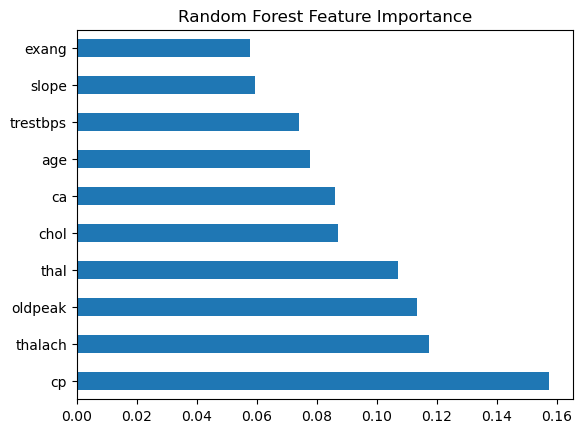

In [98]:
# Feature importance
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

## Save the model

In [99]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler, 'heart_scaler.pkl')


['heart_scaler.pkl']

In [100]:
# Provide a sample input template for users
sample = X.head(1)
sample.to_csv('heart_user_template.csv', index=False)
print("User template saved as 'heart_user_template.csv'")


User template saved as 'heart_user_template.csv'


In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import joblib

# Example columns
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["cp", "restecg", "slope", "thal"]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Full pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Fit
pipeline.fit(X_train, y_train)

# Save
joblib.dump(pipeline, "heart_rf_pipeline.pkl")


['heart_rf_pipeline.pkl']

In [106]:
import joblib
import pandas as pd

# Load pipeline
pipeline = joblib.load("heart_rf_pipeline.pkl")

# Example user input
user_data = {
    "age": [54],
    "trestbps": [130],
    "chol": [246],
    "thalach": [150],
    "oldpeak": [1.5],
    "cp": ["typical angina"],
    "restecg": ["normal"],
    "slope": ["flat"],
    "thal": ["fixed defect"]
}

user_df = pd.DataFrame(user_data)

# Predict directly
prediction = pipeline.predict(user_df)
print("Prediction:", prediction)


Prediction: [1]


In [108]:
import joblib
import pandas as pd

# Load pipeline
pipeline = joblib.load("heart_rf_pipeline.pkl")

# # Example user input
# user_data = {
#     "age": [54],
#     "trestbps": [130],
#     "chol": [246],
#     "thalach": [150],
#     "oldpeak": [1.5],
#     "cp": ["typical angina"],
#     "restecg": ["normal"],
#     "slope": ["flat"],
#     "thal": ["fixed defect"]
# }

# user_df = pd.DataFrame(user_data)

data = pd.read_csv('heart (1) data.csv')
# Predict directly
prediction = pipeline.predict(data)
print("Prediction:", prediction)


Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1]


In [110]:
data['target'] | prediction

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    1
Name: target, Length: 303, dtype: int64